In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [4]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [5]:
df= pd.read_csv('kidney_disease (1).csv')
df.head(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [7]:
#change the id column to 'index'
df.set_index('id', inplace=True)

In [8]:
#check for and print NaN values
nan_values = df.isnull().sum()
print(nan_values)

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64


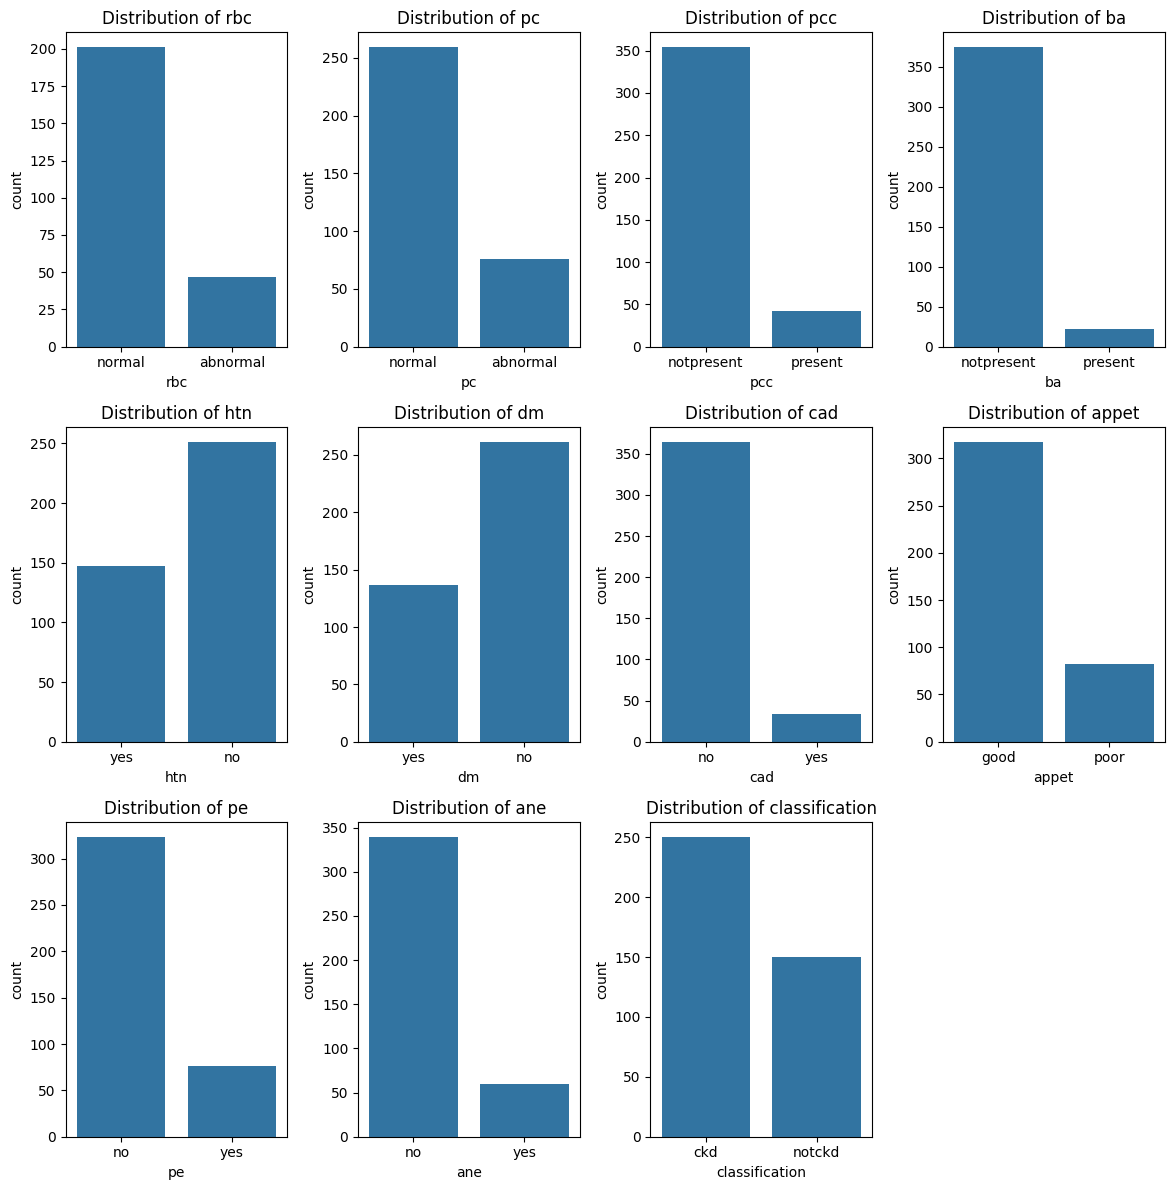

In [9]:
#plotting the categorical columns

import matplotlib.pyplot as plt
import seaborn as sns

# Create the subplots grid
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 12))

plt.rcParams['font.family'] = 'DejaVu Sans'

#these columns have some white spaces, so trim
df['dm'] = df['dm'].str.strip() 
df['cad'] = df['cad'].str.strip() 
df['classification'] = df['classification'].str.strip() 

# Plot countplot on each subplot
sns.countplot(x='rbc', data=df, ax=axes[0, 0]).set(title='Distribution of rbc')
sns.countplot(x='pc', data=df, ax=axes[0, 1]).set(title='Distribution of pc')
sns.countplot(x='pcc', data=df, ax=axes[0, 2]).set(title='Distribution of pcc')
sns.countplot(x='ba', data=df, ax=axes[0, 3]).set(title='Distribution of ba')
sns.countplot(x='htn', data=df, ax=axes[1, 0]).set(title='Distribution of htn')
sns.countplot(x='dm', data=df, ax=axes[1, 1]).set(title='Distribution of dm')
sns.countplot(x='cad', data=df, ax=axes[1, 2]).set(title='Distribution of cad')
sns.countplot(x='appet', data=df, ax=axes[1, 3]).set(title='Distribution of appet')
sns.countplot(x='pe', data=df, ax=axes[2, 0]).set(title='Distribution of pe')
sns.countplot(x='ane', data=df, ax=axes[2, 1]).set(title='Distribution of ane')
sns.countplot(x='classification', data=df, ax=axes[2, 2]).set(title='Distribution of classification')




# Adjust subplot spacing
plt.tight_layout()
# Delete the last subplot
fig.delaxes(axes[2][3])
# Show the plot
plt.show()

In [11]:
#replace normal, present, yes, good and ckd with 1
#replace abnormal, not present , no,  poor and not ckd with 0

df['rbc'] = df['rbc'].replace({'normal': 1, 'abnormal': 0})
df['pc'] = df['pc'].replace({'normal': 1, 'abnormal': 0})
df['pcc'] = df['pcc'].replace({'present': 1, 'notpresent': 0})
df['ba'] = df['ba'].replace({'present': 1, 'notpresent': 0})
df['htn'] = df['htn'].replace({'yes': 1, 'no': 0})
df['dm'] = df['dm'].replace({'yes': 1, 'no': 0})
df['cad'] = df['cad'].replace({'yes': 1, 'no': 0})
df['appet'] = df['appet'].replace({'good': 1, 'poor': 0})
df['pe'] = df['pe'].replace({'yes': 1, 'no': 0})
df['ane'] = df['ane'].replace({'yes': 1, 'no': 0})
df['classification'] = df['classification'].replace({'ckd': 1, 'notckd': 0})

In [12]:
df.head(10)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,1.0,0.0,0.0,121.0,...,44,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,NaN,1.0,0.0,0.0,NaN,...,38,6000,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,423.0,...,31,7500,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.0,...,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.0,...,35,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1
5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,0.0,0.0,74.0,...,39,7800,4.4,1.0,1.0,0.0,1.0,1.0,0.0,1
6,68.0,70.0,1.010,0.0,0.0,NaN,1.0,0.0,0.0,100.0,...,36,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1
7,24.0,NaN,1.015,2.0,4.0,1.0,0.0,0.0,0.0,410.0,...,44,6900,5,0.0,1.0,0.0,1.0,1.0,0.0,1
8,52.0,100.0,1.015,3.0,0.0,1.0,0.0,1.0,0.0,138.0,...,33,9600,4.0,1.0,1.0,0.0,1.0,0.0,1.0,1


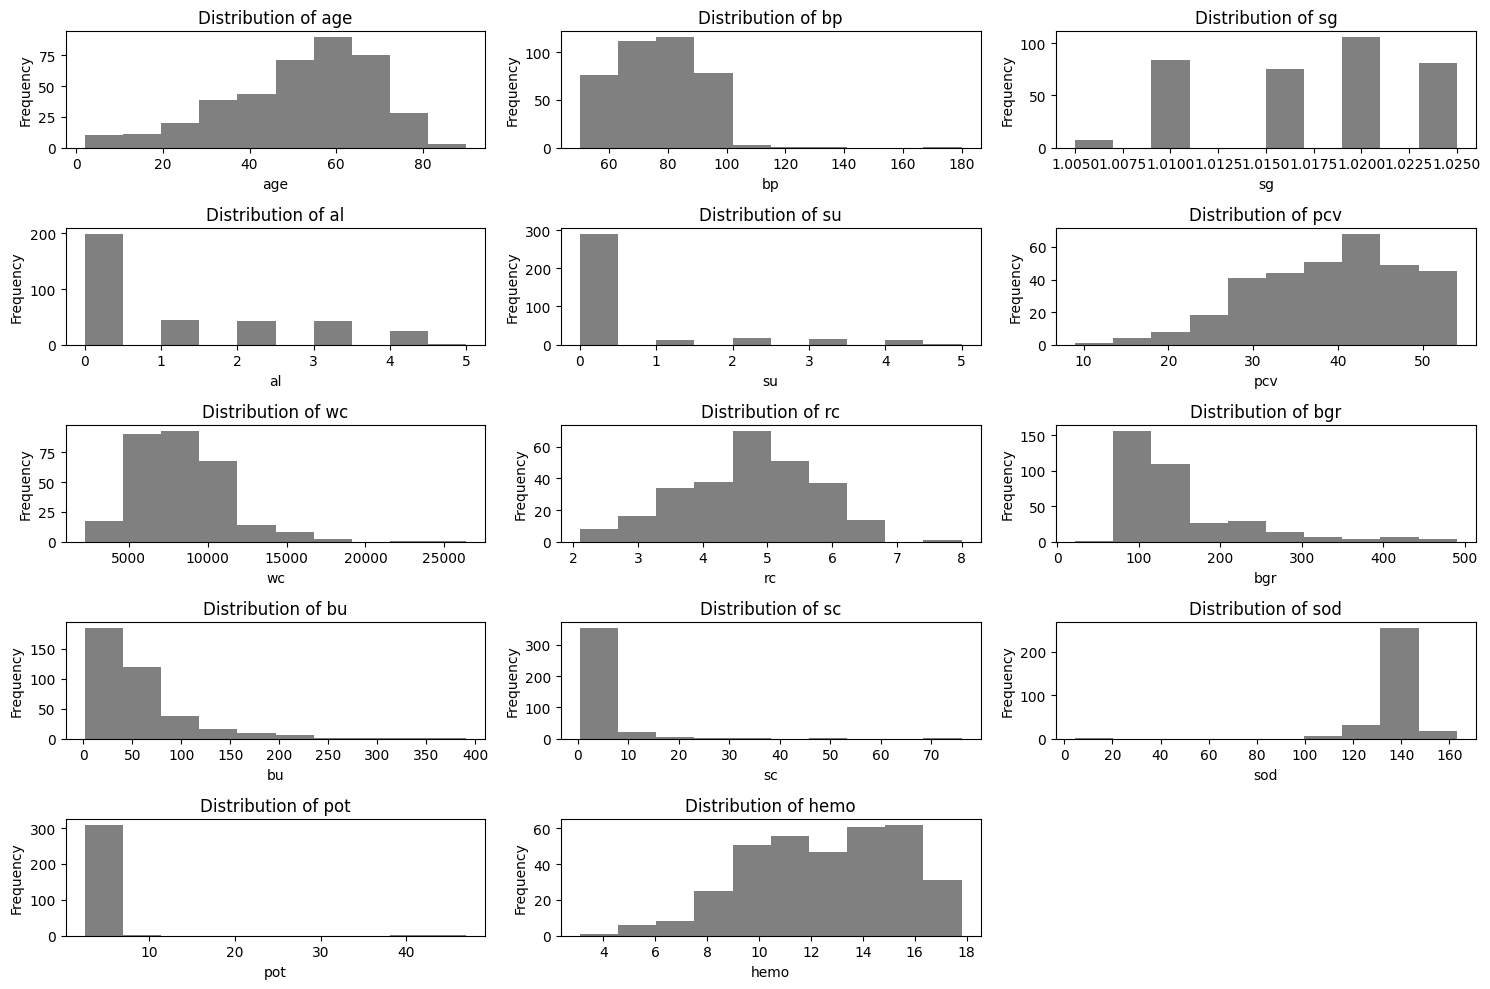

In [13]:
# Replace invalid values with NaN
df['pcv'] = df['pcv'].replace('\t?', np.nan)
df['wc'] = df['wc'].replace('\t?', np.nan)
df['rc'] = df['rc'].replace('\t?', np.nan)


# Convert the columns to float
df['pcv'] = df['pcv'].astype(float)
df['wc'] = df['wc'].astype(float)
df['rc'] = df['rc'].astype(float)

#plotting the non-categorical columns
non_cat = ["age", "bp", "sg", "al", "su","pcv","wc","rc", "bgr", "bu", "sc", "sod", "pot", "hemo"]


# Calculate the number of rows and columns for the subplot grid
num_cols = 3  # Number of columns in the subplot grid
num_rows = (len(non_cat) + num_cols - 1) // num_cols  # Calculate the number of rows needed

# Create the subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))  # Adjust the figsize as needed

# Plot histograms for each non-categorical column
for i, column in enumerate(non_cat):
    row = i // num_cols  # Calculate the row index for the current subplot
    col = i % num_cols  # Calculate the column index for the current subplot

    axes[row, col].hist(df[column], bins=10, color='grey')  # Adjust the number of bins as needed
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].set_title(f'Distribution of {column}')

# Delete unused subplots and adjust layout
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes.flatten()[j])

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [14]:
#check for duplicates
print("duplicate rows check:") 
# Check for duplicate rows
duplicate_rows = df.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicate_rows.sum()

print("Number of duplicate rows:", num_duplicates)

duplicate rows check:
Number of duplicate rows: 0


In [15]:
#get the feature variables
X = df.iloc[:,:-1]
#get the outcome variables
y = df.iloc[:, -1]

In [16]:
X

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,1.0,0.0,0.0,121.0,...,15.4,44.0,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0
1,7.0,50.0,1.020,4.0,0.0,NaN,1.0,0.0,0.0,NaN,...,11.3,38.0,6000.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0
2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,423.0,...,9.6,31.0,7500.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.0,...,11.2,32.0,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.0,...,11.6,35.0,7300.0,4.6,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,140.0,...,15.7,47.0,6700.0,4.9,0.0,0.0,0.0,1.0,0.0,0.0
396,42.0,70.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,75.0,...,16.5,54.0,7800.0,6.2,0.0,0.0,0.0,1.0,0.0,0.0
397,12.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,100.0,...,15.8,49.0,6600.0,5.4,0.0,0.0,0.0,1.0,0.0,0.0


In [17]:
y

id
0      1
1      1
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: classification, Length: 400, dtype: int64

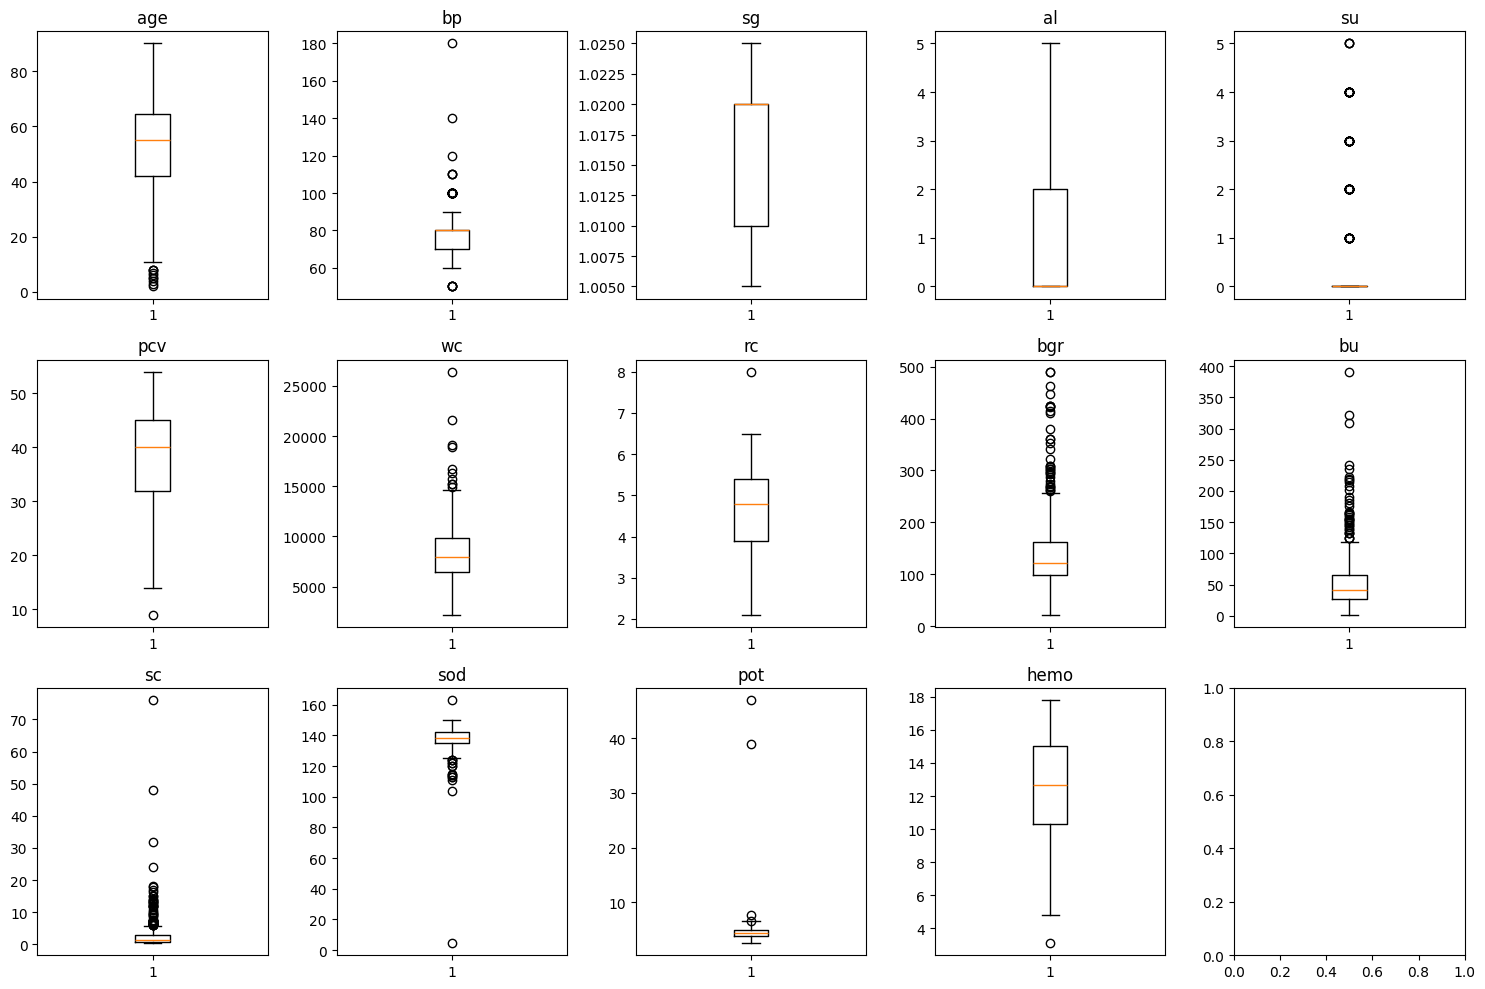

In [18]:
#check for outliers in the non-cat columns and replace with mean

# Create a box plot for each column
fig, axes = plt.subplots(nrows=(len(non_cat) // 5) + 1, ncols=5, figsize=(15, 10))

for i, column in enumerate(non_cat):
    ax = axes[i // 5, i % 5]
    ax.boxplot(df[column].dropna())
    ax.set_title(column)

# Remove unused subplots
for j in range(len(non_cat), len(non_cat) // 5 + 1 * 5):
    fig.delaxes(axes[j // 5, j % 5])

plt.tight_layout()
plt.show()

In [20]:
import numpy as np
import pandas as pd
from scipy.stats import mstats  # Add this import statement
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv('kidney_disease (1).csv')

# Define columns to be treated with Winsorization
cols_to_winsorize = ["age", "bp", "sg", "al", "su", "pcv", "wc", "rc", "bgr", "bu", "sc", "sod", "pot", "hemo"]

# Convert specified columns to numeric
for col in cols_to_winsorize:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Apply Winsorization to entire columns without dropping NaNs
df[cols_to_winsorize] = df[cols_to_winsorize].apply(lambda x: mstats.winsorize(x, limits=[0.01, 0.01]))

# Handle categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
df_categorical = pd.get_dummies(df[categorical_cols], drop_first=True)

# Concatenate the original dataframe with the one-hot encoded dataframe
df = pd.concat([df.drop(categorical_cols, axis=1), df_categorical], axis=1)

# Reset the index after preprocessing
df.reset_index(drop=True, inplace=True)

In [21]:
#replace NaN with mean
# Replace NaN values with the mean
X = X.fillna(X.mean())

In [22]:
# Convert all non-numeric columns to numeric
non_numeric_columns = df.select_dtypes(include=['object']).columns.tolist()

# Iterate over each non-numeric column and replace string values with numeric values
for column in non_numeric_columns:
    unique_values = df[column].unique()
    mapping = {value: index for index, value in enumerate(unique_values)}
    df[column] = df[column].map(mapping)

# Check the updated DataFrame
print(df.head())

   id   age    bp     sg   al   su    bgr    bu   sc    sod  ...  dm_ yes  \
0   0  48.0  80.0  1.020  1.0  0.0  121.0  36.0  1.2    NaN  ...    False   
1   1   7.0  50.0  1.020  4.0  0.0    NaN  18.0  0.8    NaN  ...    False   
2   2  62.0  80.0  1.010  2.0  3.0  423.0  53.0  1.8    NaN  ...    False   
3   3  48.0  70.0  1.005  4.0  0.0  117.0  56.0  3.8  113.0  ...    False   
4   4  51.0  80.0  1.010  2.0  0.0  106.0  26.0  1.4    NaN  ...    False   

   dm_no  dm_yes  cad_no  cad_yes  appet_poor  pe_yes  ane_yes  \
0  False    True    True    False       False   False    False   
1   True   False    True    False       False   False    False   
2  False    True    True    False        True   False     True   
3   True   False    True    False        True    True     True   
4   True   False    True    False       False   False    False   

   classification_ckd\t  classification_notckd  
0                 False                  False  
1                 False                  F

In [23]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Define X and y (assuming they are already defined)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
knn_classifier = KNeighborsClassifier()
rf_classifier = RandomForestClassifier()
svm_classifier = SVC()
dt_classifier = DecisionTreeClassifier()
nb_classifier = GaussianNB()

# Train each classifier on the training data
knn_classifier.fit(X_train, y_train)
rf_classifier.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)
dt_classifier.fit(X_train, y_train)
nb_classifier.fit(X_train, y_train)

# Make predictions on the testing data
knn_predictions = knn_classifier.predict(X_test)
rf_predictions = rf_classifier.predict(X_test)
svm_predictions = svm_classifier.predict(X_test)
dt_predictions = dt_classifier.predict(X_test)
nb_predictions = nb_classifier.predict(X_test)

# Evaluate the accuracy of each classifier
knn_accuracy = accuracy_score(y_test, knn_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)
svm_accuracy = accuracy_score(y_test, svm_predictions)
dt_accuracy = accuracy_score(y_test, dt_predictions)
nb_accuracy = accuracy_score(y_test, nb_predictions)

# Print the accuracies
print("Accuracy of k-Nearest Neighbors (KNN):", knn_accuracy)
print("Accuracy of Random Forest:", rf_accuracy)
print("Accuracy of Support Vector Machine (SVM):", svm_accuracy)
print("Accuracy of Decision Trees:", dt_accuracy)
print("Accuracy of Naive Bayes:", nb_accuracy)

Accuracy of k-Nearest Neighbors (KNN): 0.725
Accuracy of Random Forest: 1.0
Accuracy of Support Vector Machine (SVM): 0.65
Accuracy of Decision Trees: 1.0
Accuracy of Naive Bayes: 0.9875


In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=y_test, y_pred=rf_predictions)
cm

array([[28,  0],
       [ 0, 52]], dtype=int64)

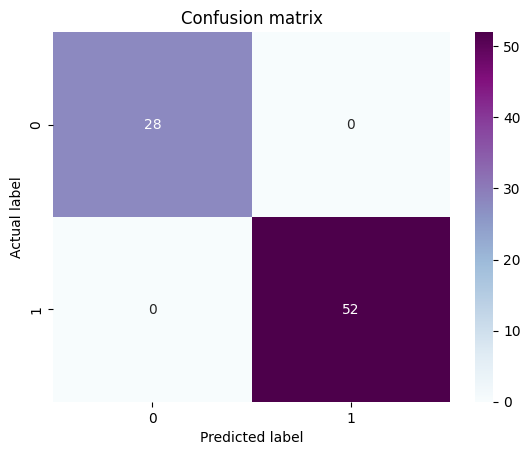

In [26]:
# Plot confusion matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(cm, annot=True, cmap="BuPu" ,fmt='g')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix')
plt.savefig('cm_ckd.png')
plt.show()

In [23]:
feature_importances = rf_classifier.feature_importances_

for feature_name, importance in zip(X.columns, feature_importances):
    print(f"{feature_name}: {importance}")

age: 0.00999908149621912
bp: 0.007594192986028894
sg: 0.17143977179079853
al: 0.09062770549115068
su: 0.011657817079033508
rbc: 0.07335452211873851
pc: 0.009140459641035872
pcc: 0.0006113895729814132
ba: 0.0004887059048507796
bgr: 0.03485234625075201
bu: 0.019350759526589576
sc: 0.05283944663890927
sod: 0.01615529773190714
pot: 0.005556381889028637
hemo: 0.18193806531347512
pcv: 0.14680797356791322
wc: 0.005214249608253287
rc: 0.0941986201676027
htn: 0.030000348618431052
dm: 0.027306755036971265
cad: 0.0004960789853084804
appet: 0.00756497322474661
pe: 0.0026728333626556814
ane: 0.0001322239966187688


In [28]:
# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature importances along with their names
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance score in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Set a threshold for feature importance
threshold = 0.01  # You can adjust this threshold as needed

# Select features with importance above the threshold
selected_features = feature_importance_df[feature_importance_df['Importance'] > threshold]['Feature'].tolist()

# Print the selected features
print("Selected Features:")
print(selected_features)

# Get the corresponding columns from the dataset
X_selected = X[selected_features]

# Now you can proceed with feature scaling and training using the selected features

Selected Features:
['hemo', 'pcv', 'sg', 'rbc', 'sc', 'al', 'rc', 'bgr', 'htn', 'dm', 'sod', 'pc', 'bu']


In [30]:
import pandas as pd

# Load the dataset
df = pd.read_csv("kidney_disease (1).csv")

# Preprocessing: Convert non-numeric columns to numeric
non_numeric_columns = df.select_dtypes(include=['object']).columns.tolist()
for column in non_numeric_columns:
    unique_values = df[column].unique()
    mapping = {value: index for index, value in enumerate(unique_values)}
    df[column] = df[column].map(mapping)

# Handle missing values by imputing with the mean or other appropriate method
# For this example, let's impute missing values with the mean
df.fillna(df.mean(), inplace=True)

# Filter the dataset to include only people with CKD (classification = 1)
ckd_data = df[df['classification'] == 1].copy()  # Use .copy() to avoid the SettingWithCopyWarning

# Define the attributes of interest
attributes_of_interest = ['hemo', 'sg', 'pcv', 'al', 'sc', 'rbc', 'rc', 'bgr', 'htn', 'dm', 'bu', 'pc', 'bp']

# Convert string values to numeric in the specified attributes
for attribute in attributes_of_interest:
    ckd_data.loc[:, attribute] = pd.to_numeric(ckd_data[attribute], errors='coerce')

# Calculate the mean values for each attribute
mean_values = ckd_data[attributes_of_interest].mean()

# Round the mean values to two decimal places for readability
mean_values_rounded = mean_values.round(2)

# Print the mean values
print("Mean values of specified attributes for people with CKD:")
print(mean_values_rounded)

# Calculate the average of mean values
average_mean_value = mean_values.mean()

# Round the average to two decimal places for readability
average_mean_value_rounded = round(average_mean_value, 2)

# Print the average of mean values
print("Average of mean values in numeric form:", average_mean_value_rounded)

Mean values of specified attributes for people with CKD:
hemo     11.11
sg        1.01
pcv       9.50
al        1.51
sc        2.55
rbc       0.50
rc        9.50
bgr     164.50
htn       0.00
dm        0.00
bu       41.00
pc        1.50
bp       70.00
dtype: float64
Average of mean values in numeric form: 24.05


In [31]:
import pickle

# Select features with importance above the threshold
selected_features = feature_importance_df[feature_importance_df['Importance'] > threshold]['Feature'].tolist()

# Print the selected features
print("Selected Features:")
print(selected_features)

# Get the corresponding columns from the dataset
X_selected = X[selected_features]

# Train the model using the selected features
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_selected, y, test_size=0.2, random_state=42)
rf_classifier_selected = RandomForestClassifier()
rf_classifier_selected.fit(X_train_selected, y_train_selected)

# Save the trained model using pickle
with open('rf_classifier_selected.pkl', 'wb') as f:
    pickle.dump(rf_classifier_selected, f)


Selected Features:
['hemo', 'pcv', 'sg', 'rbc', 'sc', 'al', 'rc', 'bgr', 'htn', 'dm', 'sod', 'pc', 'bu']
